[*********************100%***********************]  8 of 8 completed


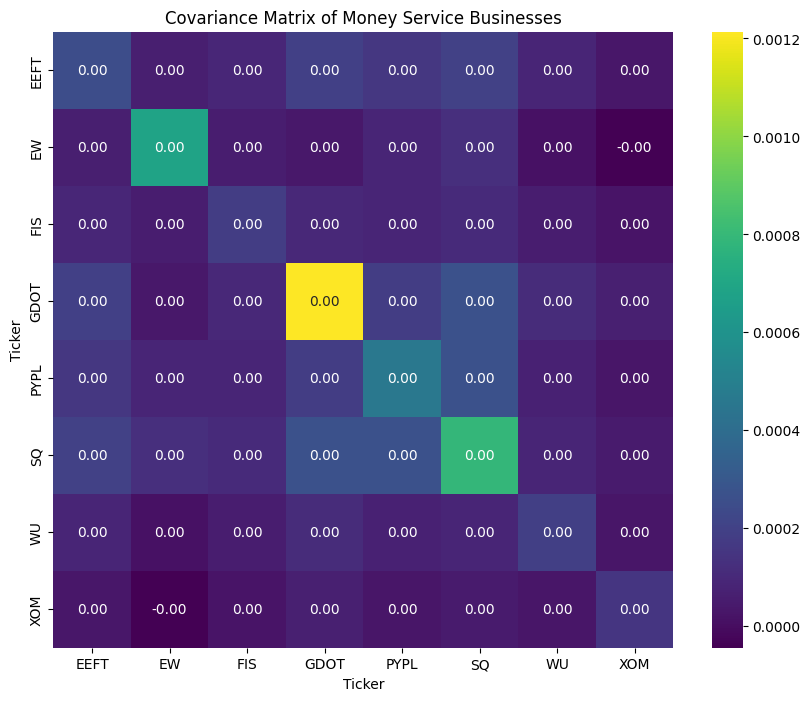

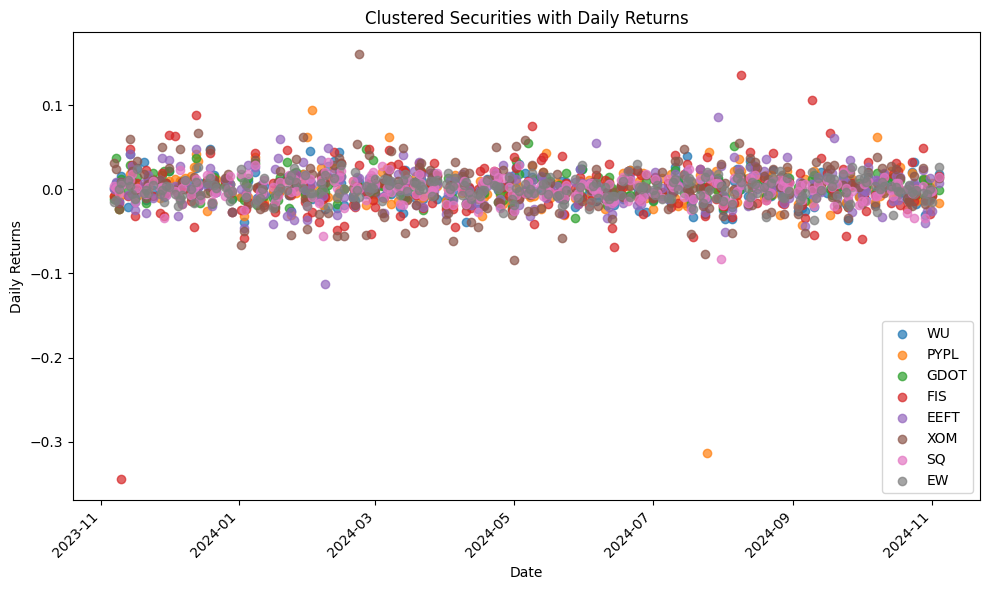

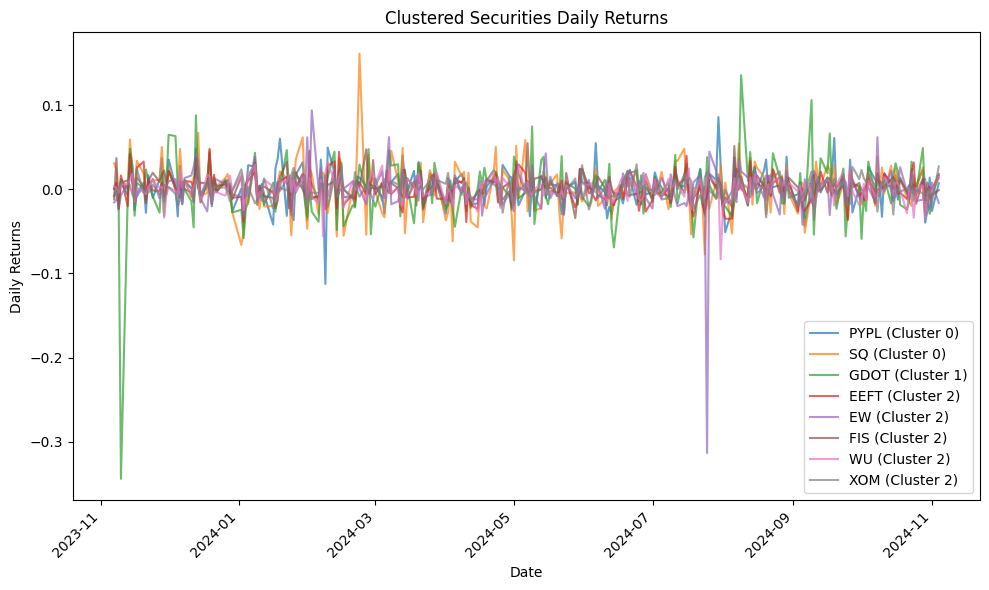

In [ ]:
# prompt: Analyze a galaxy of equity or commodity securities by the factor of covariance, clustering the galaxy by the factor. Visualize the degree to which these securities trade together, and whose prices share basic trends. Utilize a Jupyter notebook to do so, with graphic means.
# ‘please give a list of companies in the money service business industry, better known as the money transfer industry. answer my question as a python dictionary with the ticker symbol, then the readable corporation name, second.
# Prompt:
# ‘give me a list of the ticker symbols for the leading money service businesses, money transfer corporations’

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Dictionary of Money Service Business tickers and company names
money_service_businesses = {
    "WU": "Western Union",
    "PYPL": "PayPal Holdings, Inc.",
    "GDOT": "Global Payments Inc.",
    "FIS": "Fidelity National Information Services",
    "EEFT": "Euronet Worldwide",
    "XOM": "Xoom ",
    "SQ": "Square, Inc.",
    "EW": "Edwards Lifesciences Corporation" # Example of a different company to test clustering
}

# Download historical data (adjust period as needed)
tickers = list(money_service_businesses.keys())
data = yf.download(tickers, period="1y")["Adj Close"]

# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate the covariance matrix
covariance_matrix = returns.cov()

# Apply K-Means clustering (experiment with different n_clusters)
kmeans = KMeans(n_clusters=3, random_state=0)  # You can change the number of clusters
kmeans = kmeans.fit(covariance_matrix)
labels = pd.DataFrame(kmeans.labels_, index=covariance_matrix.index, columns=['Cluster'])

# Visualize clusters using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=True, cmap='viridis', fmt=".2f",
            xticklabels=covariance_matrix.columns, yticklabels=covariance_matrix.index)
plt.title('Covariance Matrix of Money Service Businesses')
plt.show()


# Visualize clusters using a scatter plot
plt.figure(figsize=(10,6))
for i in range(len(labels)):
  plt.scatter(returns.index, returns.iloc[:, i], label=tickers[i], alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('Clustered Securities with Daily Returns')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Enhanced visualization with cluster labels
plt.figure(figsize=(10,6))
for cluster in range(kmeans.n_clusters):
  subset = returns.columns[labels['Cluster'] == cluster]
  for ticker in subset:
      plt.plot(returns.index, returns[ticker], label=f'{ticker} (Cluster {cluster})', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('Clustered Securities Daily Returns')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()